# Sklearn

## sklearn.metrics

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [1]:
from sklearn import cross_validation, datasets, linear_model, metrics 
from matplotlib.colors import ListedColormap

/home/kl/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация датасетов

In [3]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)

In [4]:
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)

RuntimeError: matplotlib does not support generators as input

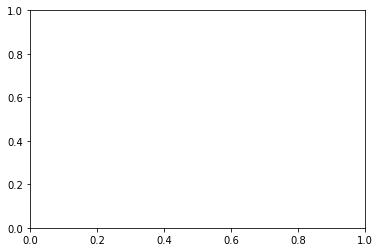

In [5]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(map(lambda x: x[0], clf_data), map(lambda x: x[1], clf_data), c = clf_target, cmap = colors)

In [ ]:
pylab.scatter(map(lambda x:x[1], reg_data), reg_target, color = 'r')
pylab.scatter(map(lambda x:x[0], reg_data), reg_target, color = 'b')

In [ ]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = cross_validation.train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)

In [ ]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = cross_validation.train_test_split(reg_data, reg_target,
                                                                                     test_size = 0.3, random_state = 1)

### Метрики качества в задачах классификации

#### Обучение модели классификации

In [ ]:
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1)

In [ ]:
classifier.fit(clf_train_data, clf_train_labels)

In [ ]:
predictions = classifier.predict(clf_test_data)

In [ ]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [ ]:
print (clf_test_labels)

In [ ]:
print (predictions)

In [ ]:
print (probability_predictions)

#### accuracy

In [ ]:
sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

In [ ]:
metrics.accuracy_score(clf_test_labels, predictions)

#### confusion matrix

In [ ]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print (matrix)

In [ ]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

In [ ]:
matrix.diagonal().sum()

#### precision 

In [ ]:
metrics.precision_score(clf_test_labels, predictions, pos_label = 0)

In [ ]:
metrics.precision_score(clf_test_labels, predictions)

#### recall

In [ ]:
metrics.recall_score(clf_test_labels, predictions, pos_label = 0)

In [ ]:
metrics.recall_score(clf_test_labels, predictions)

#### f1

In [ ]:
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

In [ ]:
metrics.f1_score(clf_test_labels, predictions)

#### classification report

In [ ]:
print (metrics.classification_report(clf_test_labels, predictions))

#### ROC curve

In [ ]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

In [ ]:
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

#### ROC AUC

In [ ]:
metrics.roc_auc_score(clf_test_labels, predictions)

In [ ]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

#### PR AUC

In [ ]:
metrics.average_precision_score(clf_test_labels, predictions)

#### log_loss

In [ ]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

### Метрики качества в задачах регрессии

#### Обучение регрессионной модели 

In [ ]:
regressor = linear_model.SGDRegressor(random_state = 1, n_iter = 20)

In [ ]:
regressor.fit(reg_train_data, reg_train_labels)

In [ ]:
reg_predictions = regressor.predict(reg_test_data)

In [ ]:
print (reg_test_labels)

In [ ]:
print (reg_predictions)

#### mean absolute error

In [ ]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

#### mean squared error

In [ ]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

#### root mean squared error

In [ ]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

#### r2 score

In [ ]:
metrics.r2_score(reg_test_labels, reg_predictions)